<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/7%20Copy_of_%D0%A4%D0%B5%D0%B2%20%D0%98%D0%A0%D0%AD%D0%9A_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_7_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BA%D1%86%D0%B8%D0%B9_%D0%9B%D1%83%D0%BA%D0%BE%D0%B9%D0%BB%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Теоретический материал:* https://youtu.be/X4yEkQPeFlo?t=2531

#Прогнозирование акций Лукойл

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=3934

In [1]:
#Загружаем библиотеки

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras import utils #Для to_categorical
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM #Стандартные слои
from google.colab import files #Загрузка файлов
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Рисовать графики сразу же
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Считываем данные с помощью pandas
base_data = pd.read_csv('/content/drive/My Drive/акции лукойл/18_19.csv', sep=';')

In [4]:
#Выводим пять первых строк
base_data.head()

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,03.01.2018,10:00:00,3341.0,3356.0,3340.0,3355.0,6088
1,03.01.2018,10:01:00,3355.0,3359.0,3353.0,3353.0,1624
2,03.01.2018,10:02:00,3351.5,3357.5,3351.5,3357.5,722
3,03.01.2018,10:03:00,3354.5,3360.0,3354.5,3358.0,3034
4,03.01.2018,10:04:00,3358.0,3360.0,3351.5,3360.0,1427


In [5]:
#Выцепялем numpy значения .values
#И выводим нулевой
txt = base_data.values[1]
print(txt)

['03.01.2018' '10:01:00' 3355.0 3359.0 3353.0 3353.0 1624]


In [0]:
base_data16 = pd.read_csv('/content/drive/My Drive/акции лукойл/16_17.csv', sep=';')
base_data18 = pd.read_csv('/content/drive/My Drive/акции лукойл/18_19.csv', sep=';')
data16_17 = base_data16.iloc[:,2:]
data18_19 = base_data18.iloc[:,2:]

In [7]:
data16_17.shape[0]

263925

In [8]:
#Выводим параметры одного фала
d = data18_19
print(len(d)) #Сколько есть записей
print(len(d.iloc[0])) #Длинна одной строки данных
print(d.iloc[0]) #Пример первой строки данных

217947
5
OPEN      3341.0
MAX       3356.0
MIN       3340.0
CLOSE     3355.0
VOLUME    6088.0
Name: 0, dtype: float64


In [0]:
#Объединяем базы из двух файлов
data = data16_17.copy()                 #Создаем копию первой базы
data = pd.concat([data16_17,data18_19]) #Присоединяем в ней втору базу
data = np.array(data)                   #Превращаем в numpy массив

In [10]:
#Сравниваем размеры
print(len(data16_17)) #Выводим размер первой базы
print(len(data18_19)) #Выводим размер второй базы
print(len(data))      #Выводим размер суммарной базы

263925
217947
481872


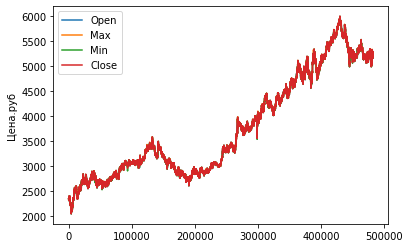

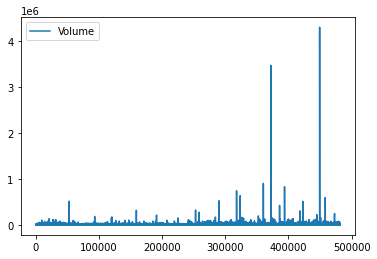

In [11]:
#Отображаем исходные от точки start и длинной step
start = 0            #С какой точки начинаем
step = data.shape[0] #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['Open', 'Max', 'Min', 'Close', 'Volume']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
for i in range(4):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+step,i], 
          label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#Канал volume
plt.plot(data[start:start+step,4], label="Volume")
plt.legend()
plt.show()

**Функция загрузки данных**

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=4322

In [0]:
#Формируем параметры загрузки данных

xLen = 300                      #Анализируем по 300 прошедшим точкам 
valLen = 30000                  #Используем 30.000 записей для проверки

trainLen = data.shape[0]-valLen # Размер тренировочной выборки

#Делим данные на тренировочную и тестовую выборки 
xTrain,xTest = data[:trainLen], data[trainLen+xLen+2:]

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain,yTest = np.reshape(data[:trainLen,0],(-1,1)), np.reshape(data[trainLen+xLen+2:,0],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, sampling_rate=1,
                               batch_size=20)

In [13]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(20, 300, 5) (20, 1)


#Полносвязная сеть

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=4506

In [14]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(100,input_shape = (xLen,5), activation="linear" )) # 5 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(1, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

#Запускаем обучение
history = modelD.fit_generator(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

#Выводим графики
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
22579/22579 [==============================] - 84s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 2/20
22579/22579 [==============================] - 83s 4ms/step - loss: 1.8801e-04 - val_loss: 2.0481e-04
Epoch 3/20
22579/22579 [==============================] - 83s 4ms/step - loss: 7.0296e-05 - val_loss: 2.7762e-05
Epoch 4/20
 3863/22579 [====>.........................] - ETA: 1:05 - loss: 5.5720e-05

KeyboardInterrupt: ignored

#Визуализация результатов

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=4564

In [0]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.plot(predVal[start:start+step, channel], 
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()
  
# Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, ch]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [0]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=300, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки

xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

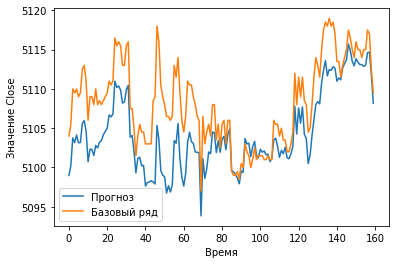

In [0]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


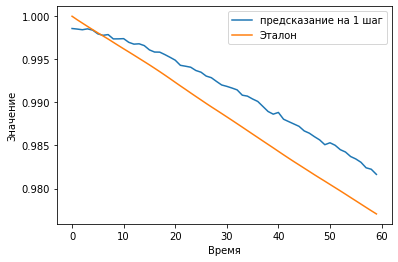

In [0]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 60, predVal, yValUnscaled)

#Одномерная свёртка

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=5889

Epoch 1/20
22579/22579 [==============================] - 77s 3ms/step - loss: 0.0020 - val_loss: 2.4518e-05
Epoch 2/20
22579/22579 [==============================] - 73s 3ms/step - loss: 1.0954e-04 - val_loss: 3.3258e-05
Epoch 3/20
22579/22579 [==============================] - 72s 3ms/step - loss: 7.1606e-05 - val_loss: 4.9990e-05
Epoch 4/20
22579/22579 [==============================] - 72s 3ms/step - loss: 7.1546e-05 - val_loss: 5.5199e-06
Epoch 5/20
22579/22579 [==============================] - 71s 3ms/step - loss: 5.9661e-05 - val_loss: 2.2170e-05
Epoch 6/20
22579/22579 [==============================] - 72s 3ms/step - loss: 7.4982e-05 - val_loss: 7.1959e-06
Epoch 7/20
22579/22579 [==============================] - 71s 3ms/step - loss: 5.5233e-05 - val_loss: 9.1303e-05
Epoch 8/20
22579/22579 [==============================] - 72s 3ms/step - loss: 7.2519e-05 - val_loss: 8.3582e-07
Epoch 9/20
22579/22579 [==============================] - 71s 3ms/step - loss: 5.6897e-05 - val_loss

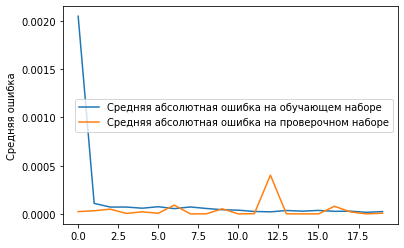

In [0]:
modelC = Sequential()

modelC.add(Conv1D(50, 5, input_shape = (xLen,5), activation="linear"))
modelC.add(Flatten())
modelC.add(Dense(10, activation="linear"))
modelC.add(Dense(1, activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(lr=1e-4))

history = modelC.fit_generator(trainDataGen,
                    epochs=20, 
                    verbose=1,
                    validation_data=testDataGen)

plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()



In [0]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

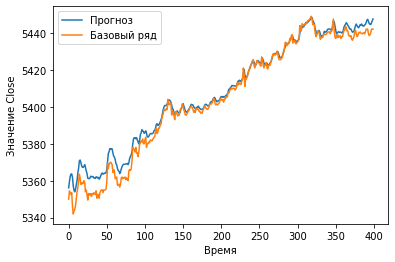

In [0]:
#Отображаем графики
showPredict(10000, 400, 0, predVal, yValUnscaled)

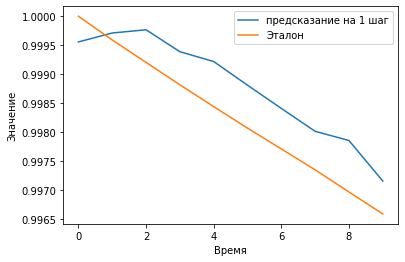

In [0]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

#LSTM

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=6123

Epoch 1/10
22579/22579 [==============================] - 245s 11ms/step - loss: 0.0104 - val_loss: 1.5433e-04
Epoch 2/10
22579/22579 [==============================] - 245s 11ms/step - loss: 1.1741e-04 - val_loss: 5.0397e-05
Epoch 3/10
22579/22579 [==============================] - 262s 12ms/step - loss: 3.9346e-05 - val_loss: 1.1783e-05
Epoch 4/10
22579/22579 [==============================] - 271s 12ms/step - loss: 1.7694e-05 - val_loss: 2.0270e-05
Epoch 5/10
22579/22579 [==============================] - 264s 12ms/step - loss: 6.1573e-06 - val_loss: 7.3626e-06
Epoch 6/10
22579/22579 [==============================] - 265s 12ms/step - loss: 1.6132e-06 - val_loss: 1.5770e-06
Epoch 7/10
22579/22579 [==============================] - 270s 12ms/step - loss: 1.2965e-06 - val_loss: 3.8373e-06
Epoch 8/10
22579/22579 [==============================] - 266s 12ms/step - loss: 1.1986e-06 - val_loss: 1.5064e-06
Epoch 9/10
22579/22579 [==============================] - 265s 12ms/step - loss: 1.1

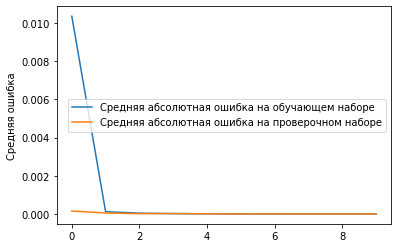

In [0]:
modelL = Sequential()
modelL.add(CuDNNLSTM(5, input_shape = (xLen, 5)))
#modelL.add(CuDNNLSTM(100, input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences="True"))
#modelL.add(CuDNNLSTM(100, return_sequences="True"))
#modelL.add(CuDNNLSTM(100, return_sequences="True"))
#modelL.add(Flatten())
modelL.add(Dense(10, activation="linear"))
modelL.add(Dense(1, activation="linear"))

modelL.compile(loss="mse", optimizer=Adam(lr=1e-5))

history = modelL.fit_generator(trainDataGen, 
                    epochs=10, 
                    verbose=1,
                    validation_data=testDataGen)

plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [0]:
#Прогнозируем данные текущей сетью
currModel = modelL
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

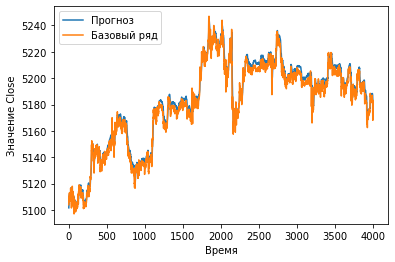

In [0]:
#Отображаем графики
showPredict(0, 4000, 0, predVal, yValUnscaled)

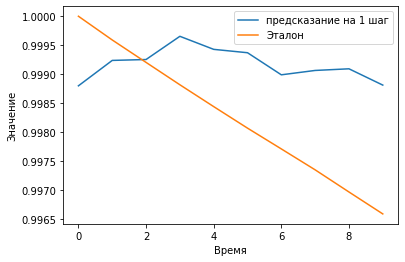

In [0]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

#ModelX

*Разбор данного раздела:* https://youtu.be/X4yEkQPeFlo?t=6261

**Сложная сеть из LSTM и Conv1D слоёв на старте и Dense слоёв в конце**

Epoch 1/6
22579/22579 [==============================] - 662s 29ms/step - loss: 7.0311e-04 - val_loss: 2.6147e-05
Epoch 2/6
22579/22579 [==============================] - 657s 29ms/step - loss: 6.5319e-05 - val_loss: 3.1980e-05
Epoch 3/6
22579/22579 [==============================] - 654s 29ms/step - loss: 3.7188e-05 - val_loss: 1.7164e-05
Epoch 4/6
22579/22579 [==============================] - 657s 29ms/step - loss: 2.8802e-05 - val_loss: 1.5258e-05
Epoch 5/6
22579/22579 [==============================] - 656s 29ms/step - loss: 2.5300e-05 - val_loss: 1.5116e-05
Epoch 6/6
22579/22579 [==============================] - 667s 30ms/step - loss: 2.1083e-05 - val_loss: 8.6777e-06


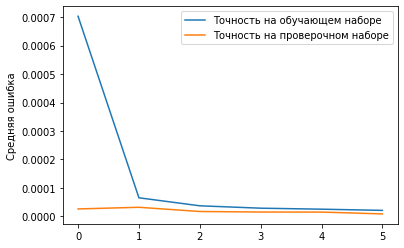

In [0]:
dataInput = Input(shape=(trainDataGen[0][0].shape[1], trainDataGen[0][0].shape[2]))

lstmWay = CuDNNLSTM(10, return_sequences="True")(dataInput)
convWay = Conv1D(10, 5, activation="relu")(dataInput)

lstmConvWay = Conv1D(10, 5, activation="relu")(lstmWay)
convLstmWay = CuDNNLSTM(10, return_sequences="True")(convWay)

lstmWay = CuDNNLSTM(10, return_sequences="True")(lstmWay)
convWay = Conv1D(10, 5, activation="relu")(convWay)

lstmWay = Flatten()(lstmWay)
convWay = Flatten()(convWay)
lstmConvWay = Flatten()(lstmConvWay)
convLstmWay = Flatten()(convLstmWay)

finWay = concatenate([lstmWay, convWay, lstmConvWay, convLstmWay])
finWay = Dense(10, activation="linear")(finWay)
finWay = Dense(yTrain.shape[1], activation="linear")(finWay)

modelX = Model(dataInput, finWay)

modelX.compile(loss="mse", optimizer=Adam(lr=1e-4))

history = modelX.fit_generator(trainDataGen, 
                    epochs=6, 
                    verbose=1,
                    validation_data=testDataGen)

plt.plot(history.history['loss'], 
         label='Точность на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Точность на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [0]:
#Прогнозируем данные текущей сетью
currModel = modelX
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

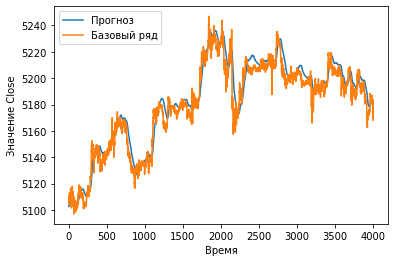

In [0]:
#Отображаем графики
showPredict(0, 4000, 0, predVal, yValUnscaled)

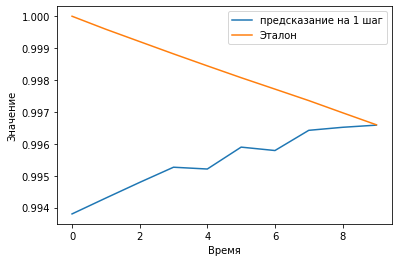

In [0]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)